In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed_cases = pd.read_csv('D:\\machine learning\\corona_detection\\time_series_covid_19_confirmed.csv')

In [3]:
death_reported = pd.read_csv('D:\\machine learning\\corona_detection\\time_series_covid_19_deaths.csv')

In [4]:
recovered_cases = pd.read_csv('D:\\machine learning\\corona_detection\\time_series_covid_19_recovered.csv')

In [6]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


In [5]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20',
       '4/30/20', '5/1/20', '5/2/20', '5/3/20'],
      dtype='object', length=107)

In [6]:
confirmed= confirmed_cases.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,0,0,0,0,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,0,0,0,0,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,0,0,0,0,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,0,0,0,0,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,0,0,0,0,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,8,8,14,16,16,16
263,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,6,6,7,10,10
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3,3


In [7]:
deaths=death_reported.loc[:,cols[4]:cols[-1]]

In [8]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [9]:
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate = []
total_recovered = []
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [10]:
confirmed_sum

3506729

In [11]:
death_sum

247470

In [27]:
recovered_sum

1125236

In [29]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4614,
 4722,
 5408,
 5830,
 6472,
 7150,
 7956,
 8823,
 9946,
 11422,
 13125,
 14825,
 16759,
 19014,
 21785,
 24788,
 28288,
 31797,
 35323,
 39439,
 44238,
 49675,
 55817,
 61812,
 67981,
 73076,
 78767,
 86662,
 93354,
 100882,
 108113,
 114146,
 119853,
 125561,
 132439,
 140658,
 147946,
 156804,
 163214,
 167773,
 173098,
 180237,
 186914,
 193667,
 199999,
 206187,
 209900,
 214484,
 220799,
 227665,
 233357,
 238619,
 243808,
 247470]

In [12]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_death = np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [13]:
days_in_future = 10
future_forecast = np.array([i for i  in range(len(dates)+ days_in_future)]).reshape(-1,1)
adjusted_days=future_forecast[:-10]

In [14]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [15]:
import time
import datetime
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
 
    future_forecast_dates.append((start_date + datetime.timedelta(days= i)).strftime('%m/%d/%Y'))
    
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [16]:
latest_confirmed = confirmed_cases[dates[-1]]
lateset_death = death_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [17]:
latest_confirmed 

0      2704
1       795
2      4474
3       748
4        35
       ... 
261       6
262      16
263      10
264       3
265     128
Name: 5/3/20, Length: 266, dtype: int64

In [22]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [24]:

country_confirmed_cases= []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']**i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_contries.remove(1)
unique_coutries=[k for k, v in sorted(zip(unique_countries,country_confirmed_cases),)]
"""

"\ncountry_confirmed_cases= []\nno_cases = []\nfor i in unique_countries:\n    cases = latest_confirmed[confirmed_cases['Country/Region']**i].sum()\n    if cases>0:\n        country_confirmed_cases.append(cases)\n    else:\n        no_cases.append(i)\nfor i in no_cases:\n    unique_contries.remove(1)\nunique_coutries=[k for k, v in sorted(zip(unique_countries,country_confirmed_cases),)]\n"

In [18]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97886],
       [ 101801],
       [ 105847],
       [ 109821],
       [ 113590],
       [ 118620],
       [ 125875],
       [ 128352],
       [ 145219],
       [ 156116],
       [ 167466],
       [ 181603],
       [ 1

In [54]:
from sklearn.model_selection import train_test_split
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed= train_test_split(days_since_1_22,world_cases, test_size= 0.15,  random_state = 0)

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]
gamma= [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}
svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True, n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished
D:\downloads\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [35]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 10}

In [36]:
svm_confirmed = svm_search.best_estimator_
svm_pred= svm_confirmed.predict(future_forecast)

In [37]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [53]:
svm_pred
X_test_confirmed

array([[ 87],
       [ 88],
       [ 89],
       [ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
       [101],
       [102]])

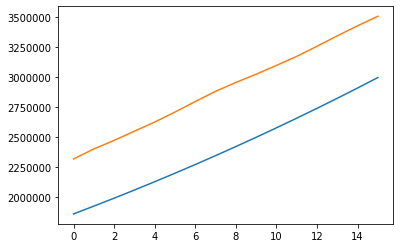

In [45]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)


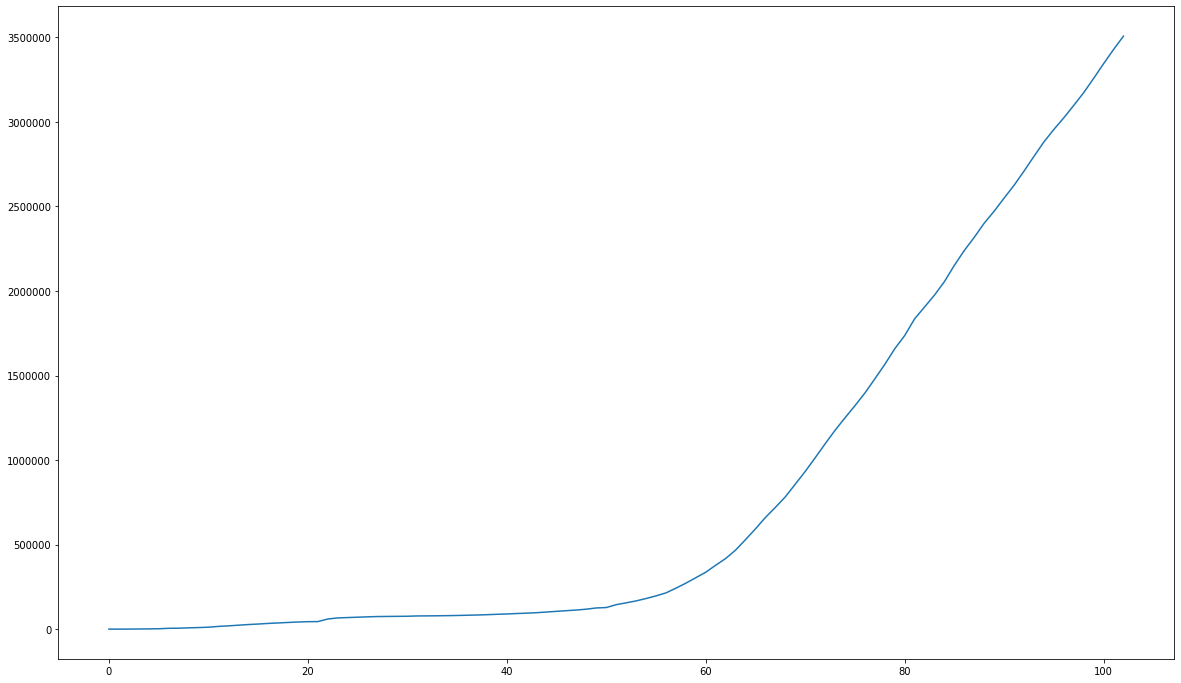

In [50]:
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.show()

NameError: name 'svm_pred' is not defined

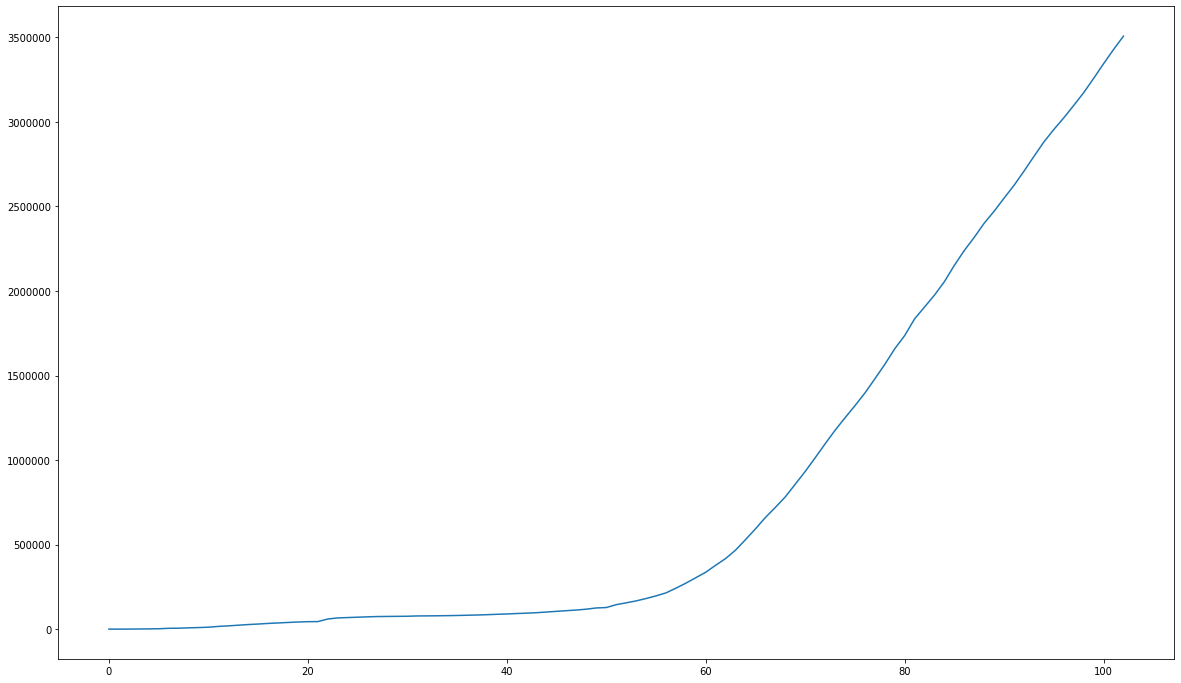

In [57]:
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.plot(future_forecast,svm_pred,linestyle = 'dashed', color='purple')
plt.show()

In [50]:
print('SVM future predictions :')
set((zip(future_forecast_dates[-10:],svm_pred[-10:])))

SVM future predictions :


NameError: name 'svm_pred' is not defined

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_confirmed,y_train_confirmed)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train_confirmed)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train_confirmed)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

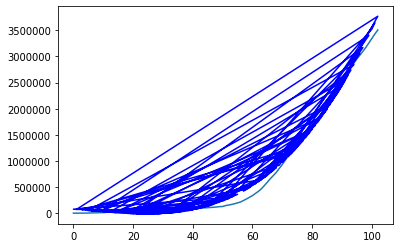

In [68]:
plt.plot(world_cases)
plt.plot(X_train_confirmed,lin_reg_2.predict(X_poly),color= 'blue')

plt.show()




In [58]:
X_pred = lin_reg_2.predict(poly_reg.fit_transform(future_forecast))

In [59]:
X_pred


array([[ 7.60862996e+04],
       [ 7.16474896e+04],
       [ 6.70593477e+04],
       [ 6.23505010e+04],
       [ 5.75495768e+04],
       [ 5.26852020e+04],
       [ 4.77860040e+04],
       [ 4.28806097e+04],
       [ 3.79976463e+04],
       [ 3.31657411e+04],
       [ 2.84135210e+04],
       [ 2.37696133e+04],
       [ 1.92626450e+04],
       [ 1.49212434e+04],
       [ 1.07740356e+04],
       [ 6.84964861e+03],
       [ 3.17670968e+03],
       [-2.16154080e+02],
       [-3.30031553e+03],
       [-6.04714754e+03],
       [-8.42802297e+03],
       [-1.04143147e+04],
       [-1.19773955e+04],
       [-1.30886384e+04],
       [-1.37194161e+04],
       [-1.38411016e+04],
       [-1.34250676e+04],
       [-1.24426871e+04],
       [-1.08653330e+04],
       [-8.66437799e+03],
       [-5.81119505e+03],
       [-2.27715701e+03],
       [ 1.96636325e+03],
       [ 6.94799287e+03],
       [ 1.26963590e+04],
       [ 1.92400888e+04],
       [ 2.66078093e+04],
       [ 3.48281478e+04],
       [ 4.3

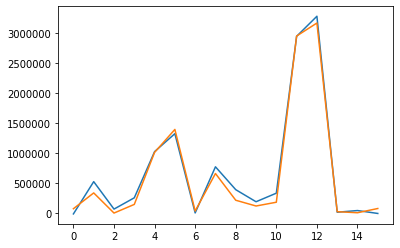

In [61]:
poly_test_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test_confirmed))
plt.plot(poly_test_pred)
plt.plot(y_test_confirmed)


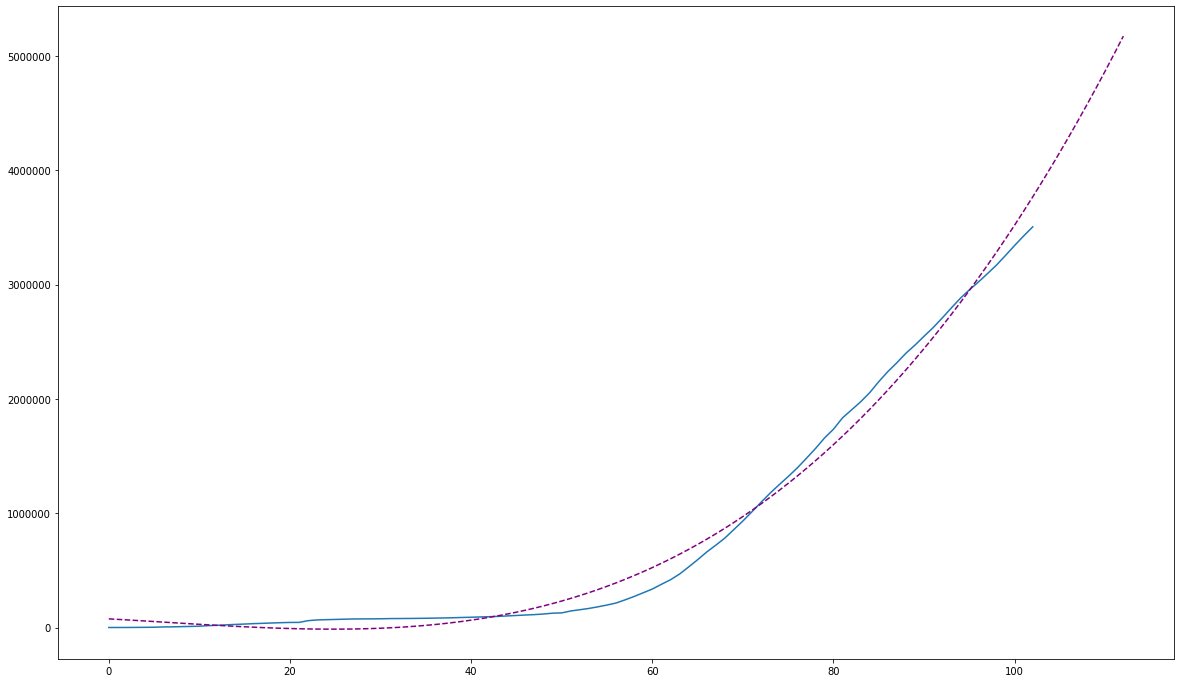

In [63]:
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.plot(future_forecast,X_pred,linestyle = 'dashed', color='purple')
plt.show()

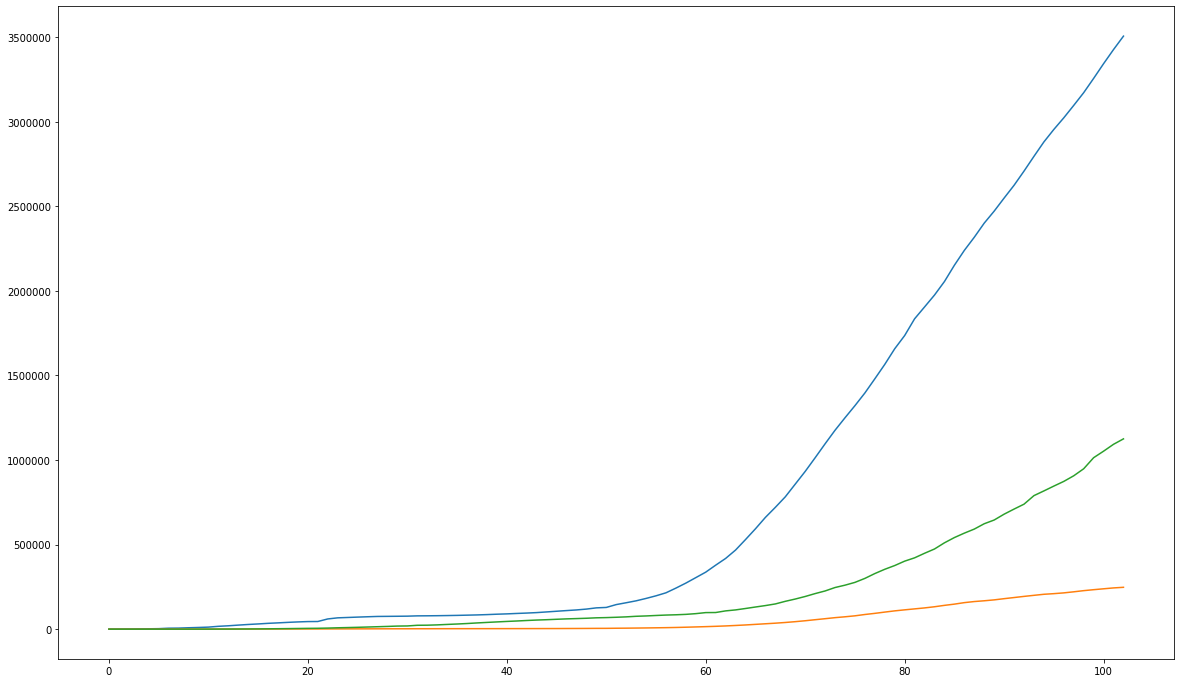

In [46]:
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.plot(total_deaths)
plt.plot(total_recovered)
plt.show()


In [64]:
print('Polynomial Regression future predictions :')
print(future_forecast_dates[-10:],X_pred[-10:])

Polynomial Regression future predictions :
['05/04/2020', '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020', '05/10/2020', '05/11/2020', '05/12/2020', '05/13/2020'] [[3897186.31093173]
 [4027744.66851074]
 [4161102.2893416 ]
 [4297287.80056161]
 [4436329.82930806]
 [4578257.00271825]
 [4723097.94792948]
 [4870881.29207904]
 [5021635.66230422]
 [5175389.68574234]]


In [97]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled=sc.fit_transform(world_cases)
X_train=[]
Y_train=[]
for i in range(10, 92):
    X_train.append(training_set_scaled[i-10:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train,Y_train= np.array(X_train), np.array(Y_train)

X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))


In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor=Sequential()

regressor.add(LSTM(units= 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units= 1))

regressor.compile(optimizer='adam',loss='mean_squared_error' )



In [75]:
regressor.fit(X_train,Y_train,epochs=50, batch_size=23)


Epoch 1/50
82/82 [==============================] - 2s 23ms/step - loss: 0.0690
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.0390
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 8/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 9/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 10/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 11/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/50
82/82 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 13/50
82/82 [============================

In [87]:
dataset_test=world_cases[-10:]

In [84]:

inputs = world_cases[82:]
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)


In [90]:
X_test=[]

for i in range(10, 20):
    X_test.append(inputs[i-10:i,0])
X_test= np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

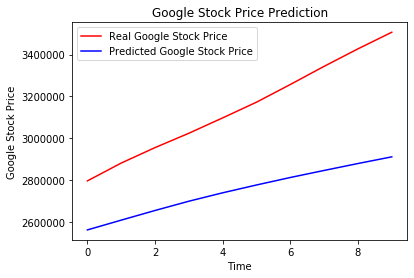

In [88]:
plt.plot(dataset_test, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


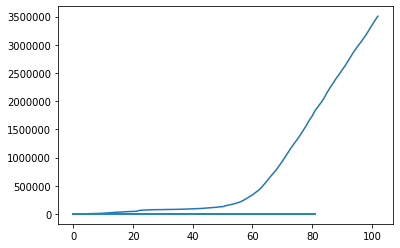

In [96]:
plt.plot(world_cases)
plt.plot(X_train)

plt.show()
